#                          BOSTON HOUSING PREDICTION

### Author: Ayangbile Daniel Bayo

### Business Objective:
    1. To develop a model that will help a real estate company's client estimate selling price of their property

#### About the Data
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts.

###### There are 14 attributes in each case of the dataset. They are:
    CRIM - per capita crime rate by town
    ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
    INDUS - proportion of non-retail business acres per town.
    CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
    NOX - nitric oxides concentration (parts per 10 million)
    RM - average number of rooms per dwelling
    AGE - proportion of owner-occupied units built prior to 1940
    DIS - weighted distances to five Boston employment centres
    RAD - index of accessibility to radial highways
    TAX - full-value property-tax rate per USD10000
    PTRATIO - pupil-teacher ratio by town
    B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    LSTAT - % lower status of the population
    MEDV - Median value of owner-occupied homes in USD1000's
    

-Note
Variable 14 seems to be censored at 50.00 (corresponding to a median price of USD50,000); Censoring is suggested by the fact that the highest median price of exactly USD50,000 is reported in 16 cases, while 15 cases have prices between USD40,000 and USD50,000, with prices rounded to the nearest hundred. [Harrison and Rubinfeld](https://www.sciencedirect.com/science/article/abs/pii/0095069678900062) do not mention any censoring.

In [38]:
# Import libraries necessary for this project
import streamlit as st
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')  # "error", "ignore", "always", "default", "module" or "once"


# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('boston.csv')

# Success
print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 506 data points with 15 variables each.


In [39]:
#Print the first five role
data.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [40]:
#Drop the "Unnamed: 0" column
data.drop(["Unnamed: 0"],axis=1,inplace=True)

In [41]:
#To know the dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [42]:
#This is to check for missing values in the dataset
data.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

The Dataset does not contain missing value, this shows the completeness of the dataset

### Exploratory Data Analysis

In [43]:
# Show the calculated statistics
minimum_price = min(data.medv)
maximum_price = max(data.medv)
mean_price = np.mean(data.medv)
median_price = np.median(data.medv)
std_price = np.std(data.medv)

print("Statistics for Boston housing dataset:\n")
print("Minimum price: ${}".format(minimum_price)) 
print("Maximum price: ${}".format(maximum_price))
print("Mean price: ${}".format(mean_price))
print("Median price ${}".format(median_price))
print("Standard deviation of prices: ${}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $5.0
Maximum price: $50.0
Mean price: $22.532806324110698
Median price $21.2
Standard deviation of prices: $9.188011545278206


##### What is the price of the houses in 2023 taking inflation into consideration between 1978 and 2023.

### Prices in Boston, 1978-2023 

According to the U.S. Bureau of Labor Statistics, prices in Boston, Massachusetts were 389.88% higher in 2023 versus 1978 (a $93,572.10 difference in value).

Between 1978 and 2023: Boston experienced an average inflation rate of 3.59% per year. This rate of change indicates significant inflation. In other words, USD24,000 in Boston in the year 1978 would cost USD117,572.10 in 2023 for an equivalent purchase. Compared to the overall inflation rate of 3.46% during this same period, inflation in Boston was higher.

In the year 1978: Pricing changed by 5.34%, which is above the average yearly change in Boston during the 1978-2023 time period. Compared to inflation for all items in 1978 (7.63%), inflation in Boston was lower.

source: https://www.in2013dollars.com/Boston-Massachusetts/price-inflation/1978-to-2023?amount=24000

In [44]:
#an increase of 389.88% means that the price x has increased by (x*389.88/100), therefore the new price should be x(1+3.8988)=4.8988x 
# we will scale the price 1000, to have the actual price, therefore to get the estimated price of each house in 2023 we multiply the column by 4808.8
data["medv"]=np.round(data["medv"]*4898.8,2)

In [45]:
#The "medv" has been scaled
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,117571.20
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,105814.08
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,169988.36
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,163619.92
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,177336.56


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


<AxesSubplot:xlabel='medv'>

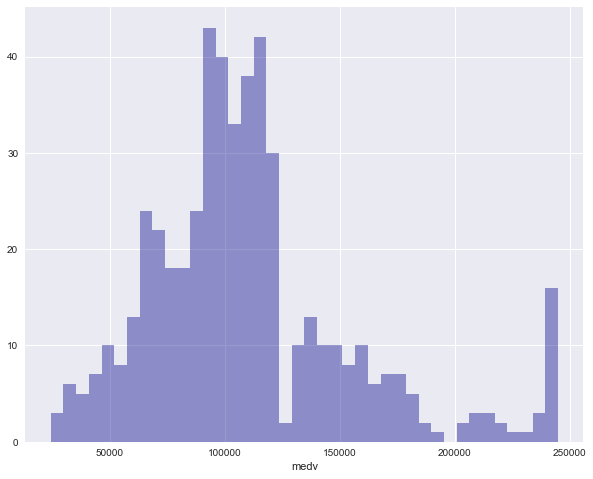

In [47]:
plt.figure(figsize=(10,8))
sns.distplot(data["medv"],kde=False,color="darkblue",bins=40)

There is an outlier in the price, this is dealt with below

In [48]:
#There appear to be an outlier in the pricing, which will affect our model if not removed
#Removing likely missing or uncensored value from the median price value
duplicate_index=list(data[data["medv"]==max(data["medv"])].index)
data.drop(duplicate_index,axis=0,inplace=True)

<AxesSubplot:>

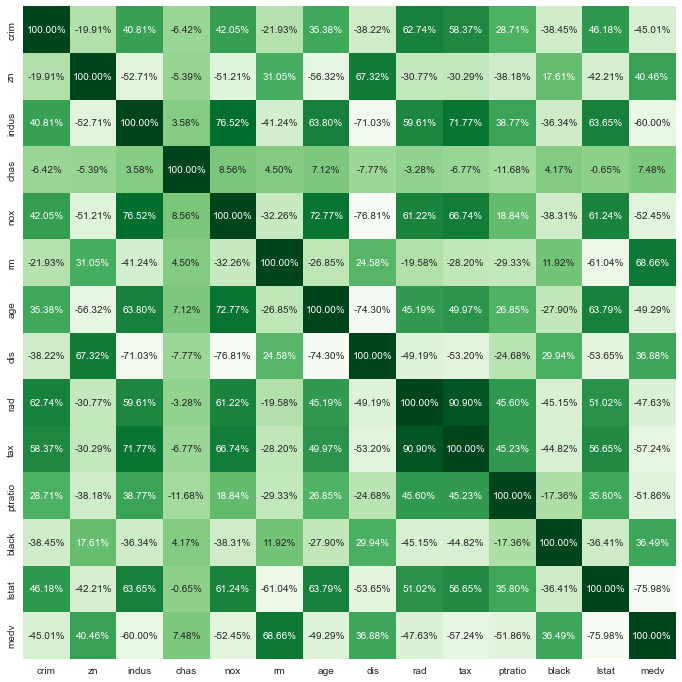

In [49]:
#Let visualize the correlation between the features
corr=data.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,cbar=False, square= True, fmt=".2%", annot=True, cmap="Greens")

### Observation:
A decrease in "ptratio" and "lstat" will lead to an increase in the price and an increase in the room number will lead to an increase in the price of the house.
    1. There is a correlation of 71.77% between "indus" and "tax"
    2. There is a correlation of 90.90% between "tax" and "rad"
    3. There is a correlation of -71.03% between "dis" and "indus"
    4. There is a high correlation between "age" and "nox"
    
The high correlation between the independent variables will lead to a problem of multicollinearity in our model.

What is Multicollinearity?
Multicollinearity occurs when two or more independent variables are highly correlated with one another in a regression model.
Multicollinearity may not affect the accuracy of the model as much. But we might lose reliability in determining the effects 
of individual features in your model – and that can be a problem when it comes to interpretability.

Therefore,"nox","indus","tax", "dis" and rad will be removed from the predictors to be used for the model development

<AxesSubplot:>

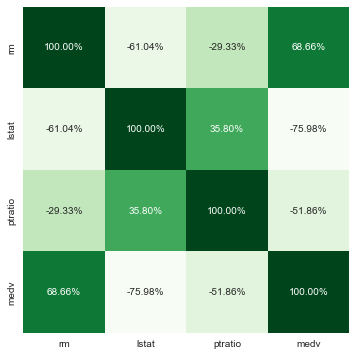

In [50]:
corr2=data[["rm","lstat","ptratio","medv"]].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr2,cbar=False, square= True, fmt=".2%", annot=True, cmap="Greens")

The selected independent variables above are well correlated with the target variable and less correlated with each other

array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'black'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

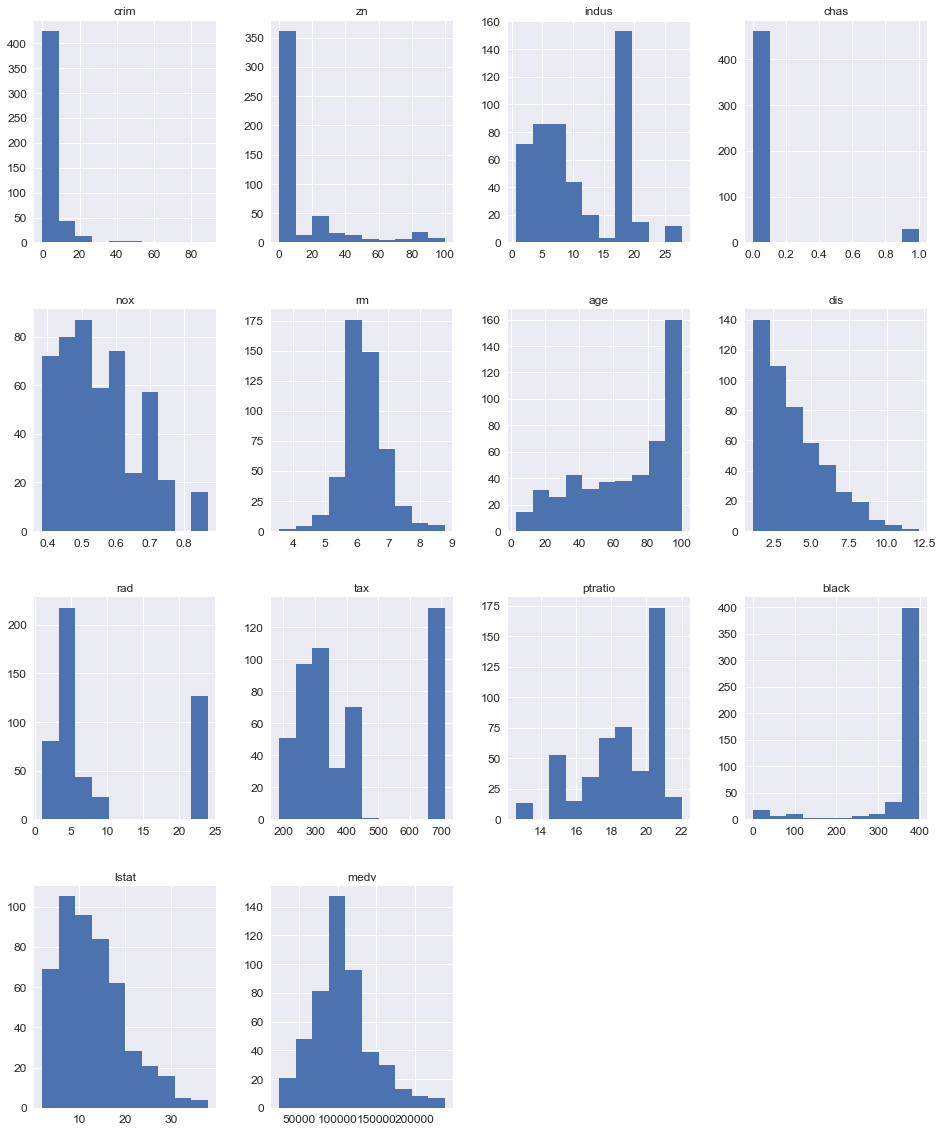

In [51]:
data.hist(figsize=(16,20),xlabelsize=12,ylabelsize=12)

You we observe the skewness of most of the independent variables, The tail region may act as an outlier for the statistical
model and we know that outliers adversely affect the model's performance especially regression-based models.

(0.0, 258153.92907568807)

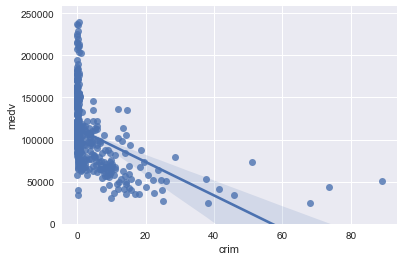

In [52]:
# Crime as potential predictor variable of price
sns.regplot(x="crim", y="medv", data=data)
plt.ylim(0,)

In [53]:
data[["crim", "medv"]].corr()

,crim,medv
crim,1.000000,-0.450115
medv,-0.450115,1.000000


(0.0, 252028.2448074316)

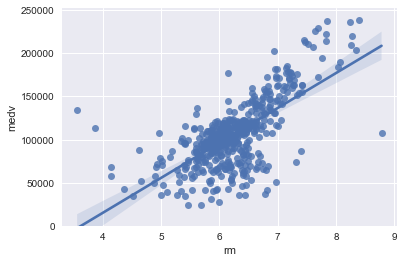

In [54]:
# average room number as potential predictor variable of price
sns.regplot(x="rm", y="medv", data=data)
plt.ylim(0,)

In [55]:
data[["rm", "medv"]].corr()

,rm,medv
rm,1.000000,0.686634
medv,0.686634,1.000000


(0.0, 251397.87823071546)

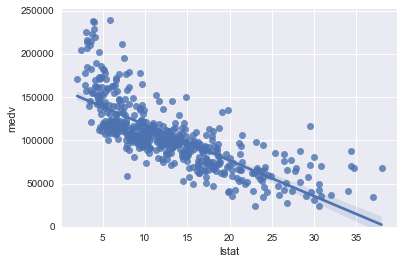

In [56]:
# Lower class ratio as potential predictor variable of price
data[["lstat", "medv"]].corr()

sns.regplot(x="lstat", y="medv", data=data)
plt.ylim(0,)


In [57]:
data[["lstat", "medv"]].corr()


,lstat,medv
lstat,1.000000,-0.759837
medv,-0.759837,1.000000


(0.0, 249789.812)

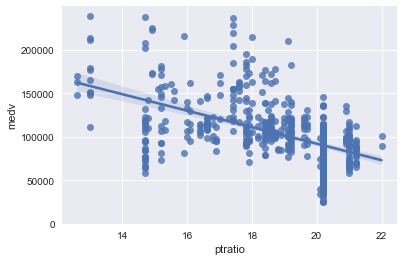

In [58]:
# Parent to teacher ratio as potential predictor variable of price

sns.regplot(x="ptratio", y="medv", data=data)
plt.ylim(0,)


In [59]:
data[["ptratio", "medv"]].corr()

,ptratio,medv
ptratio,1.000000,-0.518641
medv,-0.518641,1.000000


(0.0, 249789.812)

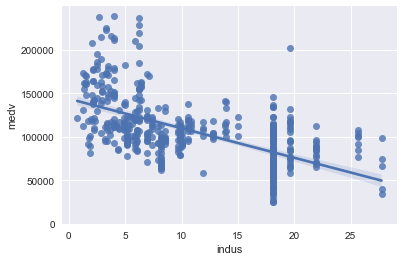

In [60]:
# Industry as potential predictor variable of price
sns.regplot(x="indus", y="medv", data=data)
plt.ylim(0,)

In [61]:
data[["indus","medv"]].corr()

,indus,medv
indus,1.000000,-0.600005
medv,-0.600005,1.000000


(0.0, 249789.812)

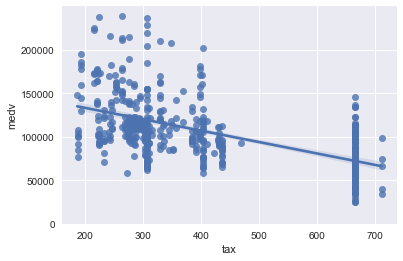

In [62]:
# Tax as potential predictor variable of price
sns.regplot(x="tax", y="medv", data=data)
plt.ylim(0,)

In [63]:
data[["tax","medv"]].corr()

,tax,medv
tax,1.000000,-0.572442
medv,-0.572442,1.000000


(0.0, 249789.812)

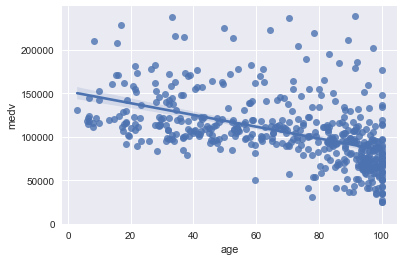

In [64]:
#Age as a potential predictor
sns.regplot(x="age",y="medv",data=data)
plt.ylim(0,)

In [65]:
data[["age","medv"]].corr()

,age,medv
age,1.000000,-0.492915
medv,-0.492915,1.000000


##### Categorical variable

<AxesSubplot:xlabel='chas', ylabel='count'>

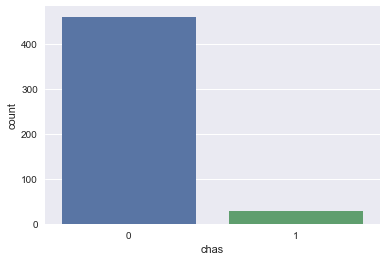

In [66]:
sns.countplot(x="chas",data=data)

## Model Development

#### 1. Defining Performance Metric

Measuring the quality of a given model without quantifying its performance over training and testing will be difficult. 
For this project,I will be calculating the coefficient of determination, R2, to quantify your model's performance. 
The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" 
that model is at making predictions.

The R2 score is the proportion of the variance in the dependent variable that is predictable from the independent variable
R2 score between 0 and 1 indicates the extent to which the dependent variable is predictable. An R2 score of 0.40 means that 40 percent of the variance in Y is predictable from X.

In [67]:
def performance_metric(y_true, y_predict):
    score = np.round(r2_score(y_true,y_predict)*100)
    return score

### 2. Splitting the Dataset into Training and Testing subset

In [68]:
#Splitting the dataset into the predictor and the target 
feature=data[["rm","lstat","ptratio"]]
price=data["medv"]


#Splitting the data into training and testing subset
feature_train,feature_test,price_train,price_test=train_test_split(feature,price,test_size=0.2,random_state=0)

## Analysing the model Performance

### 1. Detecting Overfitting and Underfitting with Learning Curves

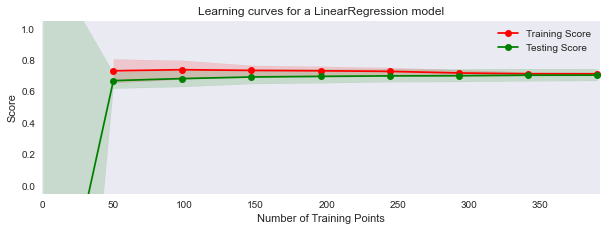

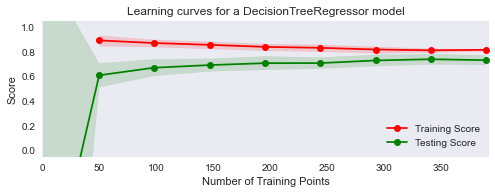

In [69]:
### Imports
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import ShuffleSplit, train_test_split
import warnings
warnings.filterwarnings("ignore", category = UserWarning, module = "matplotlib")
# Display inline matplotlib plots with IPython
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')

def learning_curves(X,y,estimator):
    train_sizes = np.rint(np.linspace(1, feature.shape[0]*0.8-2, 9)).astype(int)
    cv = ShuffleSplit(n_splits = 10, test_size = 0.2, random_state = 0)

    sizes, train_scores, test_scores = learning_curve(estimator =estimator,X=feature,y=price,train_sizes = train_sizes, cv = cv,scoring = 'r2')


    # Find the mean and standard deviation for smoothing
    train_std = np.std(train_scores, axis = 1)
    train_mean = np.mean(train_scores, axis = 1)
    test_std = np.std(test_scores, axis = 1)
    test_mean = np.mean(test_scores, axis = 1)

    # Subplot the learning curve
    plt.style.use('seaborn')
    plt.plot(sizes, train_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(sizes, test_mean, 'o-', color = 'g', label = 'Testing Score')
    plt.fill_between(sizes, train_mean - train_std,train_mean + train_std, alpha = 0.15, color = 'r')
    plt.fill_between(sizes, test_mean - test_std,test_mean + test_std, alpha = 0.15, color = 'g')

    # Labels
    title = 'Learning curves for a ' + str(estimator).split('(')[0] + ' model'
    plt.title(title)
    plt.xlabel('Number of Training Points')
    plt.ylabel('Score')
    plt.xlim([0, feature.shape[0]*0.8])
    plt.ylim([-0.05, 1.05])
    plt.grid()
    plt.legend()
    plt.show()


plt.figure(figsize = (10,7))

for model, i in [(LinearRegression(),1),(DecisionTreeRegressor(max_depth=3),2)]:
    plt.subplot(2,1,i)
    learning_curves(feature,price,model)

We can observe from the curves that:

    The Linear Regression model has a low training and testing score.
    The Decision Tree model has a high training and testing score.
From here, we can determine that the Linear Regression model underfits and the Decision Tree model is just right.

### Fitting a Model

In [70]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
def optimal_model(X, y):
    
    # Create cross-validation sets from the training data
    cv_sets =ShuffleSplit(n_splits=10,random_state=0,test_size =0.20)
    regressor =DecisionTreeRegressor()
    params = {"max_depth":[1,2,3,4,5,6,7,8,9,10]}
    scoring_fnc = make_scorer(performance_metric)
    grid = GridSearchCV(regressor,params,scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

In [71]:
# Fit the training data to the model using grid search
result= optimal_model(feature_train, price_train)

# Produce the value for 'max_depth'
print("Parameter 'max_depth' is {} for the optimal model.".format(result.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


In [72]:
#Using a decision tree regressor model with max_depth of 4
reg=DecisionTreeRegressor(max_depth=4)
reg.fit(feature_train,price_train)
price_pred=reg.predict(feature_test)


#Model Evaluation
performance_metric(price_test,price_pred)

77.0

In [73]:
#Saving the model
import pickle

pickle_out=open("regressor.pkl",mode="wb")
pickle.dump(reg,pickle_out)
pickle_out.close()

In [74]:
%%writefile web_app.py
"""
This is a web app created with Streamlit to host this project. Feel free to use this file as a guide or visit my
article on the topic (linked below).
"""

import streamlit as st
import pandas as pd
import numpy as np
import pickle
from PIL import Image
from sklearn.tree import DecisionTreeRegressor

st.header("Predicting Selling Price of Boston House")



st.write("""
Created By: Daniel Bayo Ayangbile

This is a Streamlit web app created so users could predict the selling price of their home. 

Use the sidebar to provide information about your house and the click the predict button.
""")
st.image(Image.open('boston_house.jpg'), width = 400)

st.sidebar.header('Welcome! Please input your details below')

def main():
    title=st.sidebar.selectbox("Title",("Mr.","Mrs.","Miss."))
    name=st.sidebar.text_input("Name of Buyer","Type here")
    no_rm=st.sidebar.slider("Number of Rooms in the House",3,9,1)
    poverty_level=st.sidebar.slider("Neighborhood poverty Level(%)",2,38,2)
    student_teacher_ratio=st.sidebar.slider("Ratio of Student to Teacher in Nearby School",12,22,2)
    data = {"Title":title,"Name":name,"Number of Room":no_rm,"Student_Teacher Ratio":student_teacher_ratio,
            "Poverty_Level":poverty_level}
    
    
    features = pd.DataFrame(data, index=[0])
    input_data=[[no_rm,poverty_level,student_teacher_ratio]]


    #Write out input selection
    st.subheader('User Input Table')
    st.write(features)

    #Load in model
    regressor = pickle.load(open('regressor.pkl', 'rb'))

    # Apply model to make predictions
    #Displaying your prediction
    if st.sidebar.button("Predict"):
        result=regressor.predict(input_data)
        st.success("Dear {0} {1} you should consider selling your house at :$ {2}".format(title,name,np.round(result[0],0)))



#st.subheader('Exploratory Data Analysis')
#st.write("""
#We identified some important features in the readmittance rate that you can explore below. To begin, here is the distribution
#of the classes in the original data set. We see that a majority of patients are not readmitted within a year. Patients that 
#are readmitted often have complications to their diabetes or the specific care recieved.
#""")
#st.image(Image.open('Images/Readmit_rate.png'), width = 500)

#st.write("""
#Now looking at the patient population given the long-term blood sugar HbA1c test, we see only about 20% of patients received
#this test, but, of those, 50% then had their medication changed and were less likely to be readmitted.
#""")
#st.image(Image.open('Images/HbA1c_test.png'), width = 500)

#st.write("""
#Finally, we see that age plays an important role. As expected, older patients have more complications due to their diabetes.
#Age was binned according to this chart into 0-30, 30-60, and 60-100.
#""")
#st.image(Image.open('Images/Readmit_vs_age.png'), width = 500)

#st.subheader('More Information')
#st.write("""
#For a deeper dive into the project, please visit the [repo on GitHub](https://github.com/ArenCarpenter/Diabetes_Hospitalizations) 
#where you can find all the code used in analysis, modeling, visualizations, etc. You can also read my 
#[articles](https://arencarpenter.medium.com/) in Towards Data Science on my other projects. 
#""")
if __name__=='__main__':
  main()

Overwriting web_app.py
